# Problem 11.9

## Part b

In [1]:
import delim ./data/chapter11/Chapter_11_Dupas_2010_Dataset,clear

(3 vars, 1120 obs)


In [2]:
gen purchased =.
replace purchased = 1 if purchasednet=="yes"
replace purchased = 0 if purchasednet=="no"

rename cfw_id region		


matrix t=J(100, 2, .)
matrix colnames t=gammas lls


forvalues i = 1/100 {
		
		gen log_price_star_`i' = log(price + `i')
		qui glm purchased log_price_star_`i' i.region, family(binomial) link(logit)
		
		matrix t[`i', 1] = `i'
		matrix t[`i', 2] = `e(ll)'

}



(1,120 missing values generated)

(509 real changes made)

(611 real changes made)










      +--------+
      | gammas |
      |--------|
  19. |     19 |
      +--------+


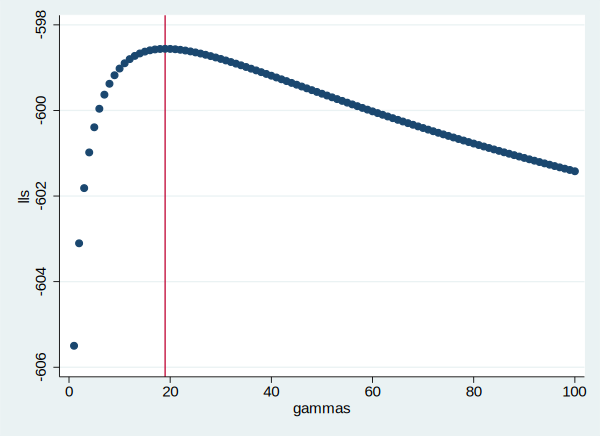





file ../results/chapter11/exercise_11_9_graph.pdf could not be opened


r(603);
r(603);


In [3]:
svmat double t, names(col)

qui sum lls
list gammas if lls==r(max)


scatter lls gammas, xline(19)
graph export ../results/chapter11/exercise_11_9_graph.pdf